In [11]:
import tensorflow as tf
mnist= tf.keras.datasets.mnist  #28*&28 images of hand_written digits 0-9
(x_train,y_train),(x_test,y_test)= mnist.load_data()
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

###entire model is define as follow:
#create input layer
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
##create two hidden layers, 128 neurons in each layer
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
##create output layer, 10 represents numbers of clusters
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))
#########################
###optimize the created NN
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
###trainning model
model.fit(x_train,y_train,epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2602 - accuracy: 0.9237
Epoch 2/3
60000/60000 [==============================] - 5s 89us/sample - loss: 0.1069 - accuracy: 0.9671
Epoch 3/3
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0732 - accuracy: 0.9771


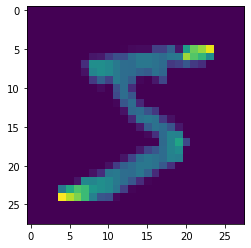

In [8]:
import matplotlib.pyplot as plt 
plt.imshow(x_train[0])

In [13]:
###evalute model
val_loss,val_acc=model.evaluate(x_test,y_test)
print(val_loss,val_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.08453228902332485 0.9721


In [14]:
##save model
model.save("epic_num_reader_model")
##reload saved model
new_model=tf.keras.models.load_model("epic_num_reader_model")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: epic_num_reader_model\assets


In [17]:
##make prediction:
prediction = new_model.predict([x_test])
import numpy as np
print(np.argmax(prediction[0]))

7


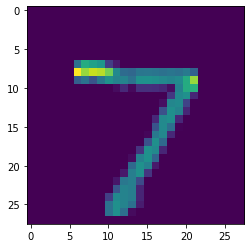

In [18]:
plt.imshow(x_test[0])